<h2>IMPLEMENTATION OF TWITTER SENTIMENT ANALYSIS</h2>


In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

AUTHENTICATION OF TWITTER API

In [ ]:
# Authentication
accessToken = "1043574002999091206-5qkdR5k3Hxt4imfuizPv7Y6KCfHM2F"
accessTokenSecret = "4FDBbcCyyHx8osTYmSsE53SWyBmGJFmOXmtjvYU6U7XP3"
consumerKey = "r62WAswfBsML38KeU5qUjRl4p"
consumerSecret = "e4N8JSCswVRPzuJB4NBLCFZVbxuYsHLG6997D5eZi8WF9ufSJh"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

Sentiment Analysis for "Pakistan Cricket" for 1000 tweets


In [ ]:


def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Pakistan Cricket
Please enter how many tweets to analyze: 1000


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  461
negative number:  233
neutral number:  306


In [ ]:
tweet_list

,0
0,RT @daniel86cricket: Pakistan &gt; India #Cricket
1,How ridiculous is that?!?! \n\nIndian police h...
2,@ShefVaidya @narendramodi @ShekharGupta Why us...
3,RT @trtworld: Indian Muslim cricketer faces on...
4,RT @OpIndia_com: While BLM activists rallied t...
...,...
995,RT @Cricketracker: New Zealand cricket team ❤️...
996,RT @anussaeed1: Gary Kirsten is a strong candi...
997,@PARILikePEARL Mere ooper kuch dino ke liye ki...
998,RT @Rehan_ulhaq: Just checking; Did Pakistan c...


Creating PieChart visualization of data

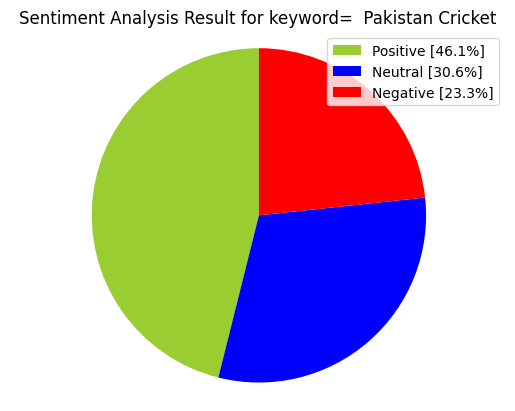

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @daniel86cricket: Pakistan &gt; India #Cricket,RT @daniel86cricket: Pakistan &gt; India #Cricket
1,How ridiculous is that?!?! \n\nIndian police h...,How ridiculous is that?!?! \n\nIndian police h...
2,@ShefVaidya @narendramodi @ShekharGupta Why us...,@ShefVaidya @narendramodi @ShekharGupta Why us...
3,RT @trtworld: Indian Muslim cricketer faces on...,RT @trtworld: Indian Muslim cricketer faces on...
4,RT @OpIndia_com: While BLM activists rallied t...,RT @OpIndia_com: While BLM activists rallied t...
...,...,...
988,@KazmiWajahat @iamamirofficial @harbhajan_sing...,@KazmiWajahat @iamamirofficial @harbhajan_sing...
990,"They wanted to end Pakistan cricket, they are ...","They wanted to end Pakistan cricket, they are ..."
991,@press_wing's account has been withheld in Ind...,@press_wing's account has been withheld in Ind...
992,Salam Greetings to all friends from Dubai. Hea...,Salam Greetings to all friends from Dubai. Hea...


In [ ]:
tweet_list

,0,text
0,RT @daniel86cricket: Pakistan &gt; India #Cricket,RT @daniel86cricket: Pakistan &gt; India #Cricket
1,How ridiculous is that?!?! \n\nIndian police h...,How ridiculous is that?!?! \n\nIndian police h...
2,@ShefVaidya @narendramodi @ShekharGupta Why us...,@ShefVaidya @narendramodi @ShekharGupta Why us...
3,RT @trtworld: Indian Muslim cricketer faces on...,RT @trtworld: Indian Muslim cricketer faces on...
4,RT @OpIndia_com: While BLM activists rallied t...,RT @OpIndia_com: While BLM activists rallied t...
...,...,...
988,@KazmiWajahat @iamamirofficial @harbhajan_sing...,@KazmiWajahat @iamamirofficial @harbhajan_sing...
990,"They wanted to end Pakistan cricket, they are ...","They wanted to end Pakistan cricket, they are ..."
991,@press_wing's account has been withheld in Ind...,@press_wing's account has been withheld in Ind...
992,Salam Greetings to all friends from Dubai. Hea...,Salam Greetings to all friends from Dubai. Hea...


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @daniel86cricket: Pakistan &gt; India #Cricket,pakistan gt india cricket
1,How ridiculous is that?!?! \n\nIndian police h...,how ridiculous is that indian police hav...
2,@ShefVaidya @narendramodi @ShekharGupta Why us...,why us did you see owasi tweet and his ...
3,RT @trtworld: Indian Muslim cricketer faces on...,indian muslim cricketer faces online abuse wh...
4,RT @OpIndia_com: While BLM activists rallied t...,while blm activists rallied to outlaw blackl...
5,RT @MawraHocane: Our national heroes have put ...,our national heroes have put us on the world ...
6,"Would be great if India, Pakistan meet again i...",would be great if india pakistan meet again i...
9,RT @HindustanTimes: T20 WC | 'Were you safe in...,t20 wc were you safe in uae akhtar take...
11,"While BLM activists rallied to outlaw ""blackli...",while blm activists rallied to outlaw blackli...
12,RT @xuxa_chick: Cricket match mn thrill kis ch...,cricket match mn thrill kis chz ka nam h ye t...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @daniel86cricket: Pakistan &gt; India #Cricket,pakistan gt india cricket,0.000000,0.000000,positive,0.000,0.588,0.412,0.2732
1,How ridiculous is that?!?! \n\nIndian police h...,how ridiculous is that indian police hav...,-0.333333,1.000000,negative,0.240,0.601,0.159,-0.2263
2,@ShefVaidya @narendramodi @ShekharGupta Why us...,why us did you see owasi tweet and his ...,0.700000,0.600000,positive,0.000,0.847,0.153,0.4404
3,RT @trtworld: Indian Muslim cricketer faces on...,indian muslim cricketer faces online abuse wh...,0.250000,0.333333,negative,0.458,0.542,0.000,-0.9136
4,RT @OpIndia_com: While BLM activists rallied t...,while blm activists rallied to outlaw blackl...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @MawraHocane: Our national heroes have put ...,our national heroes have put us on the world ...,-0.800000,1.000000,neutral,0.134,0.732,0.134,0.0018
6,"Would be great if India, Pakistan meet again i...",would be great if india pakistan meet again i...,0.400000,0.875000,positive,0.000,0.796,0.204,0.6249
9,RT @HindustanTimes: T20 WC | 'Were you safe in...,t20 wc were you safe in uae akhtar take...,0.318182,0.477273,positive,0.000,0.805,0.195,0.4404
11,"While BLM activists rallied to outlaw ""blackli...",while blm activists rallied to outlaw blackli...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
12,RT @xuxa_chick: Cricket match mn thrill kis ch...,cricket match mn thrill kis chz ka nam h ye t...,0.000000,0.000000,positive,0.000,0.894,0.106,0.3612


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,183,56.13
neutral,82,25.15
negative,61,18.71


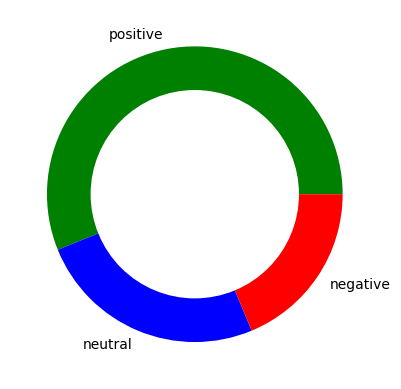

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,108.72
neutral,100.22
positive,106.29


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.10
neutral,12.04
positive,17.44


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Applying tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @daniel86cricket: Pakistan &gt; India #Cricket,pakistan gt india cricket,0.000000,0.000000,positive,0.000,0.588,0.412,0.2732,29,4,pakistan gt india cricket,"[, pakistan, gt, india, cricket]","[, pakistan, gt, india, cricket]","[, pakistan, gt, india, cricket]"
1,How ridiculous is that?!?! \n\nIndian police h...,how ridiculous is that indian police hav...,-0.333333,1.000000,negative,0.240,0.601,0.159,-0.2263,118,18,how ridiculous is that indian police hav...,"[how, ridiculous, is, that, indian, police, ha...","[ridiculous, indian, police, arrested, three, ...","[ridicul, indian, polic, arrest, three, muslim..."
2,@ShefVaidya @narendramodi @ShekharGupta Why us...,why us did you see owasi tweet and his ...,0.700000,0.600000,positive,0.000,0.847,0.153,0.4404,84,17,why us did you see owasi tweet and his ...,"[, why, us, did, you, see, owasi, tweet, and, ...","[, us, see, owasi, tweet, speech, saying, good...","[, us, see, owasi, tweet, speech, say, good, t..."
3,RT @trtworld: Indian Muslim cricketer faces on...,indian muslim cricketer faces online abuse wh...,0.250000,0.333333,negative,0.458,0.542,0.000,-0.9136,126,20,indian muslim cricketer faces online abuse wh...,"[, indian, muslim, cricketer, faces, online, a...","[, indian, muslim, cricketer, faces, online, a...","[, indian, muslim, cricket, face, onlin, abus,..."
4,RT @OpIndia_com: While BLM activists rallied t...,while blm activists rallied to outlaw blackl...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,124,22,while blm activists rallied to outlaw blackl...,"[, while, blm, activists, rallied, to, outlaw,...","[, blm, activists, rallied, outlaw, blacklist,...","[, blm, activist, ralli, outlaw, blacklist, ev..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

326 Number of reviews has 1147 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aap,aapan,aata,abba,abhi,abl,absolut,abus,account,achiev,action,activ,activist,actual,aditya,adityanath,admiss,ador,afg,afgh,afghan,afghanistan,afgvpak,afgvspak,afridi,aft,aga,age,ago,agra,ahmedabad,aim,aimim,air,akhtar,al,alam,alhamdulillah,ali,...,wicket,win,wing,wish,withheld,within,without,wo,woh,women,wonder,wor,work,worl,world,worldcup,worldslarg,worldwi,worri,wors,would,wow,wrong,ye,year,yesterday,yet,yogi,yohana,yorker,youtub,yr,yusuf,zaheer,zaman,zealand,zee,zindabaad,zindabad,zoum
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Most Used Words in tweets can be represented as - 


In [ ]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
pakistan,227
cricket,189
india,93
team,57
celebr,57
indian,43
win,41
arrest,37
match,32
victori,30


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('pakistan cricket', 65),
 ('cricket team', 40),
 ('celebrating pakistan', 30),
 ('cricket match', 21),
 ('cricket win', 21),
 ('indian police', 19),
 ('india pakistan', 19),
 ('world cup', 19),
 ('t20 world', 17),
 ('police arrest', 17),
 ('arrest seven', 17),
 ('seven celebrating', 17),
 ('saqlain mushtaq', 15),
 ('pakistan victory', 12),
 ('cheering pakistan', 12),
 ('great india', 10),
 ('pakistan meet', 10),
 ('pakistan win', 9),
 ('cricket pakistan', 9),
 ('india cricket', 8)]